Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [3]:
# import neccessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
# now import our Data Set
data=pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    From the above data set we can identify that there are total 11 features and 1 label, label is  Survived. Also data set contain Nan values also.

In [5]:
#size of our data is
data.shape

(891, 12)

In [6]:
data.describe()# Statistical analysis of our data set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# now check that whether our data contain equaly distributed in label
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Now check that there is Nan present our not
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# now check the data set type also
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#now we will remove the Name PassengerID coloumn from our data set
data=data.drop('Name',axis=1)
data.drop('PassengerId',axis=1,inplace=True)

In [11]:
# we have to remove the Nan data from our data set
#for age we will remove it with mean 
data['Age']=data['Age'].fillna(data['Age'].mean())

In [12]:
# using mode function we will replce nan in Embarked coloum
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])
#cabin with ssome unknown variable
data['Cabin'] = data['Cabin'].fillna('U')

In [13]:
# now check the data set
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Data Visualization


3    491
1    216
2    184
Name: Pclass, dtype: int64


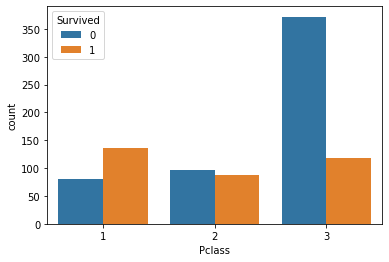

In [14]:
# Now we will find the counts of Survived in each coloumn
print(data["Pclass"].value_counts())
sns.countplot('Pclass',data=data,hue='Survived')
plt.show()


From this figure we can clearly identify that The passengers in 3 class were dies most and in Pclass one more passengers survived. in Plcass 2 both the numbers are al ost equal

male      577
female    314
Name: Sex, dtype: int64


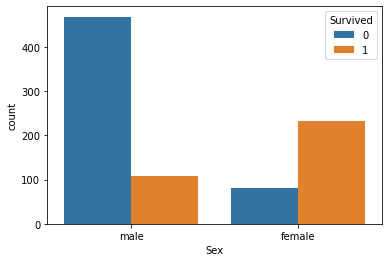

In [15]:
print(data["Sex"].value_counts())
sns.countplot('Sex',data=data,hue='Survived')
plt.show()

Form this figure number of male passengers were high also the number of non susvived numbers of male is high

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


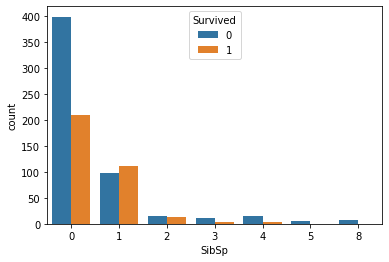

In [16]:
print(data["SibSp"].value_counts())
sns.countplot('SibSp',data=data,hue='Survived')
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


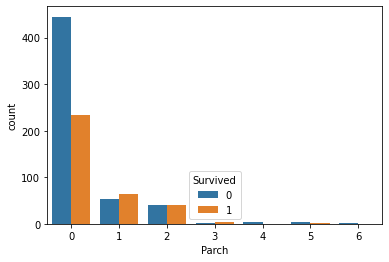

In [17]:
print(data["Parch"].value_counts())
sns.countplot('Parch',data=data,hue='Survived')
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


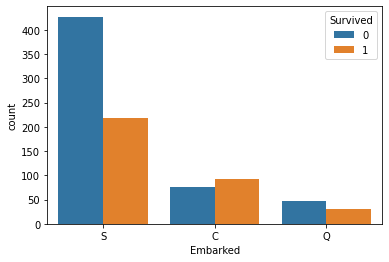

In [18]:
print(data["Embarked"].value_counts())
sns.countplot('Embarked',data=data,hue='Survived')
plt.show()

For embarked value passengers borded from  s is high also the less survival rate also

In [19]:
# Now we will encode Sex, Embarked and cabin  using label encoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data['Cabin']=le.fit_transform(data['Cabin'])

# Please note that the ticked number is not at all necessary
data.drop('Ticket',axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


Now we will check correlation with help of heatmap

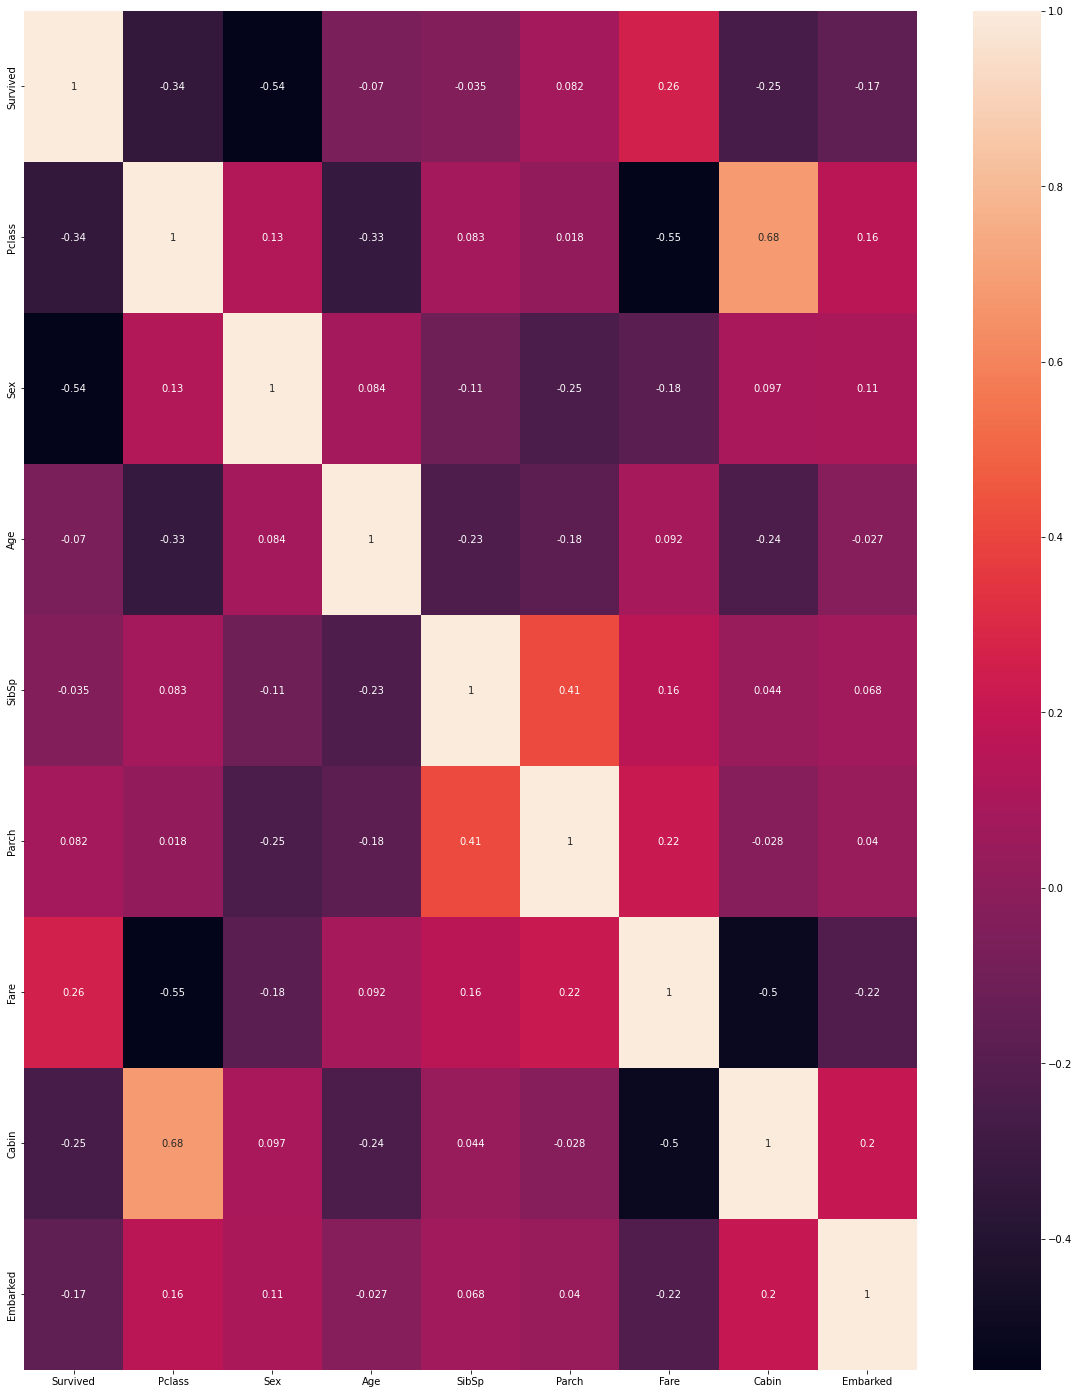

In [20]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),annot=True)
plt.show()

From this we can infer that there is not that much correlation between features

# Now we will analyse skewness present in data

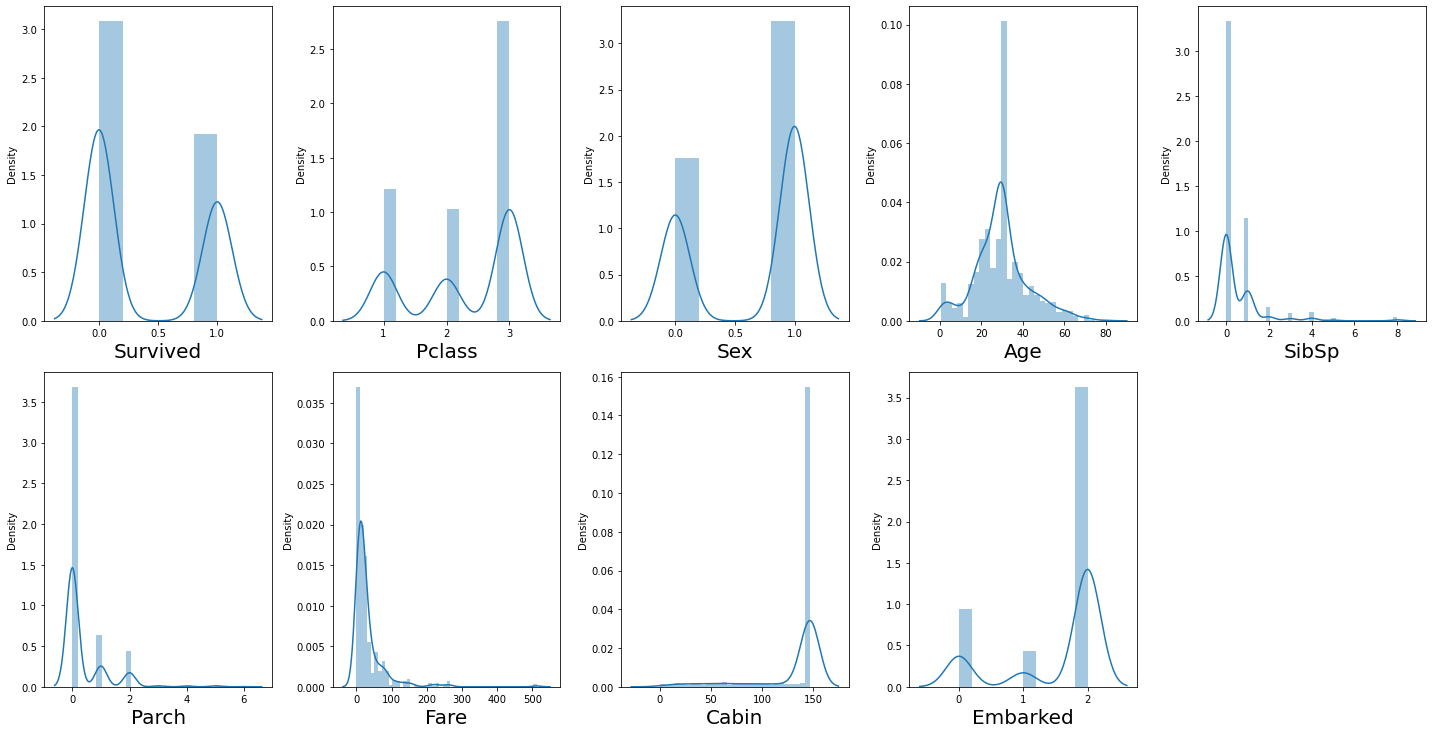

In [21]:
plt.figure(figsize=(20,25))
plotnum = 1
for col in data:
    if plotnum<=9:
        plt.subplot(5,5,plotnum)
        sns.distplot(data[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

from this we can identify some skewness are presnt in Sibsp, Parch, Fare, Cabin

In [22]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin      -2.167313
Embarked   -1.264823
dtype: float64

In [23]:
hi_sw=['SibSp','Parch','Fare','Cabin',]


So we will remove the find the skewness values using powertranform or log tranform

In [24]:

skew_df=data[hi_sw].copy()
skew_df.skew()

SibSp    3.695352
Parch    2.749117
Fare     4.787317
Cabin   -2.167313
dtype: float64

In [25]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer()
sk=pw.fit_transform(skew_df)
sk=pd.DataFrame(sk,columns=skew_df.columns)
sk.skew()

SibSp    0.808608
Parch    1.228795
Fare    -0.040329
Cabin   -1.602847
dtype: float64

In [26]:
new_df=data.copy()


In [27]:
new_df[hi_sw]=sk[hi_sw].copy()

In [28]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1.373636,-0.560253,-0.878820,0.504664,2
1,1,1,0,38.0,1.373636,-0.560253,1.336651,-2.047906,0
2,1,3,0,26.0,-0.679850,-0.560253,-0.790065,0.504664,2
3,1,1,0,35.0,1.373636,-0.560253,1.067352,-2.241273,2
4,0,3,1,35.0,-0.679850,-0.560253,-0.774439,0.504664,2


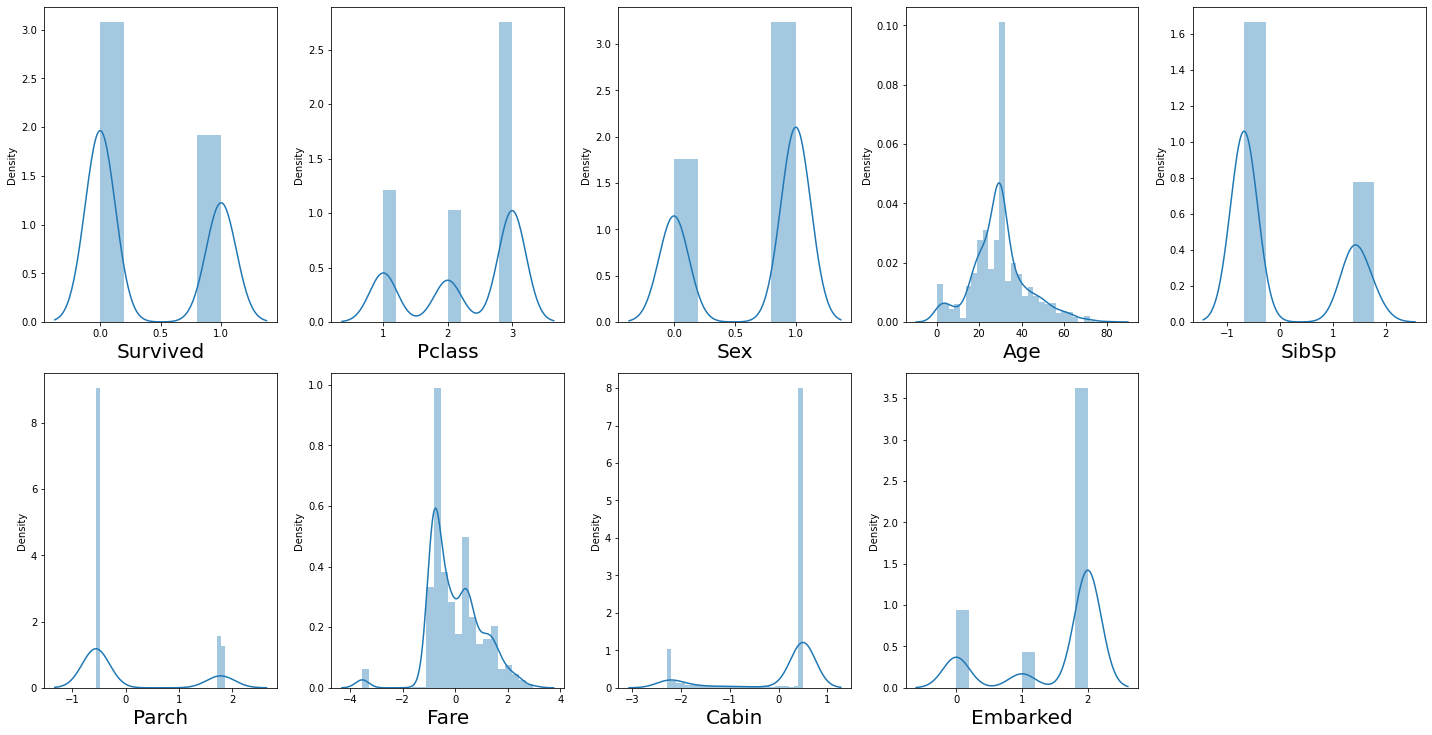

In [29]:
plt.figure(figsize=(20,25))
plotnum = 1
for col in new_df:
    if plotnum<=9:
        plt.subplot(5,5,plotnum)
        sns.distplot(new_df[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

Now skewness reduced but not compleatly

In [30]:
#now Seperate the data in to features and label
x=new_df.drop('Survived',axis=1)
y=new_df['Survived']

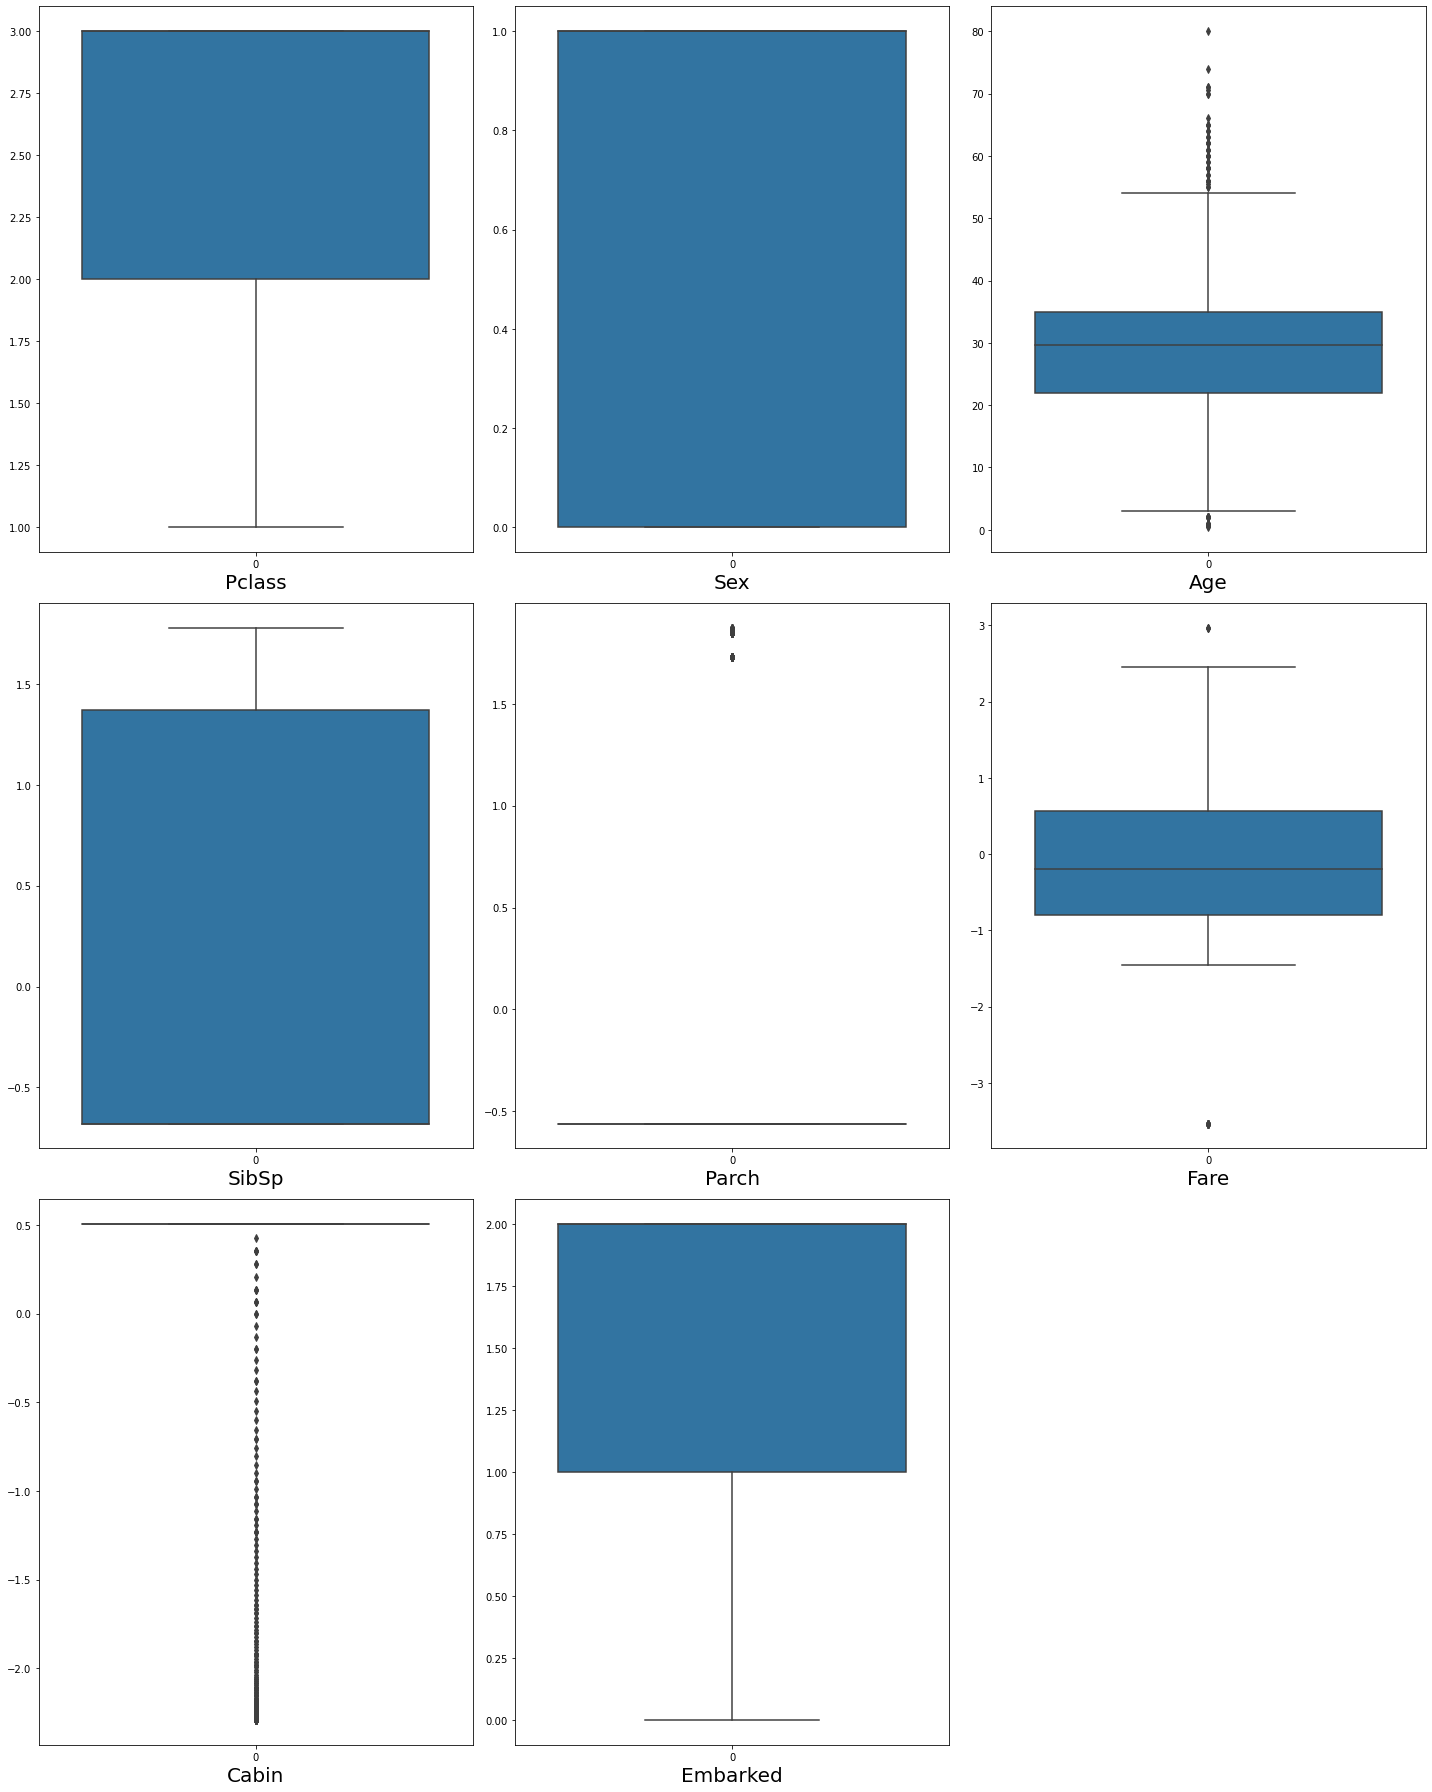

In [31]:
# Now find the outliears
plt.figure(figsize=(20,25))
plotnum = 1
for col in x:
    if plotnum<=8:
        plt.subplot(3,3,plotnum)
        sns.boxplot(data=x[col])
        plt.xlabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

For some features outliers are present so we need to remove the same.

In [33]:
from scipy.stats import  zscore
z=np.abs(zscore(x))
z

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.827377,0.737695,0.592481,1.373636,0.560253,0.878820,0.504664,0.585954
1,1.566107,1.355574,0.638789,1.373636,0.560253,1.336651,2.047906,1.942303
2,0.827377,1.355574,0.284663,0.679850,0.560253,0.790065,0.504664,0.585954
3,1.566107,1.355574,0.407926,1.373636,0.560253,1.067352,2.241273,0.585954
4,0.827377,0.737695,0.407926,0.679850,0.560253,0.774439,0.504664,0.585954
...,...,...,...,...,...,...,...,...
886,0.369365,0.737695,0.207709,0.679850,0.560253,0.294907,0.504664,0.585954
887,1.566107,1.355574,0.823344,0.679850,0.560253,0.527906,2.287326,0.585954
888,0.827377,1.355574,0.000000,1.373636,1.846856,0.288885,0.504664,0.585954
889,1.566107,0.737695,0.284663,0.679850,0.560253,0.527906,2.219898,1.942303


In [34]:
x = x[(z <3).all(axis=1)] #taking threshold value as 3
print(x.shape)
y=y[(z<3).all(axis=1)]
print(y.shape)

(869, 8)
(869,)


In [35]:
# Now we will make or data set balance using smote
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [37]:
y.value_counts()

0    529
1    529
Name: Survived, dtype: int64

# Now we will standerdise or data using standard scalar

In [39]:
sd=StandardScaler()
x_scalled=pd.DataFrame(sd.fit_transform(x),columns=x.columns)
x_scalled

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.898618,0.907820,-0.553555,1.308805,-0.587355,-1.098147,0.543407,0.635642
1,-1.463464,-1.101539,0.697916,1.308805,-0.587355,1.339197,-1.920798,-1.836820
2,0.898618,-1.101539,-0.240688,-0.727791,-0.587355,-1.000503,0.543407,0.635642
3,-1.463464,-1.101539,0.463265,1.308805,-0.587355,1.042930,-2.107471,0.635642
4,0.898618,0.907820,0.463265,-0.727791,-0.587355,-0.983312,0.543407,0.635642
...,...,...,...,...,...,...,...,...
1053,0.898618,-1.101539,-0.193219,-0.727791,-0.587355,-1.000503,0.543407,0.635642
1054,0.898618,-1.101539,0.048646,-0.727791,-0.587355,-1.025019,0.543407,-0.600589
1055,-0.282423,-1.101539,-0.788206,1.308805,-0.587355,0.075575,0.543407,0.635642
1056,-1.463464,-1.101539,-0.980488,0.375417,0.453994,1.468443,-2.067773,-1.836820


# Modeling

Finding the best random state


In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    pred = dtc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8584905660377359  on Random_state  54


# Now creating spliting data usnig this best random state

In [53]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=54)

In [54]:
# Now we will import all other algorithms and find the best one
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree Classifier

In [55]:

dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8459119496855346
[[129  25]
 [ 24 140]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       154
           1       0.85      0.85      0.85       164

    accuracy                           0.85       318
   macro avg       0.85      0.85      0.85       318
weighted avg       0.85      0.85      0.85       318



# RandomForestClassifier


In [58]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8364779874213837
[[133  21]
 [ 31 133]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       154
           1       0.86      0.81      0.84       164

    accuracy                           0.84       318
   macro avg       0.84      0.84      0.84       318
weighted avg       0.84      0.84      0.84       318



# SVC

In [60]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.6886792452830188
[[132  22]
 [ 77  87]]
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       154
           1       0.80      0.53      0.64       164

    accuracy                           0.69       318
   macro avg       0.71      0.69      0.68       318
weighted avg       0.72      0.69      0.68       318



# Logistic Regression

In [62]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8176100628930818
[[127  27]
 [ 31 133]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.83      0.81      0.82       164

    accuracy                           0.82       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.82      0.82      0.82       318



# Kneighbour Model

In [63]:
knn=KNN()
knn.fit(x_train,y_train)
knn.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8176100628930818
[[127  27]
 [ 31 133]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       154
           1       0.83      0.81      0.82       164

    accuracy                           0.82       318
   macro avg       0.82      0.82      0.82       318
weighted avg       0.82      0.82      0.82       318



# Gradient Boost Classifier

In [92]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

0.8490566037735849
[[135  19]
 [ 29 135]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       154
           1       0.88      0.82      0.85       164

    accuracy                           0.85       318
   macro avg       0.85      0.85      0.85       318
weighted avg       0.85      0.85      0.85       318



In [68]:
# Now check the cross validation scores for each model
# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean())

0.8110480193150318


In [69]:
# cv score for Random Forest Classifier
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8327863721720469


In [71]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6900205669319502


In [72]:
# cv score for Logistic Regression 
print(cross_val_score(lr,x,y,cv=5).mean())


0.7978315300008942


In [67]:
# cv score for KNN Classifier
print((cross_val_score(knn,x,y,cv=5).mean()))


0.7874452293660019


In [73]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(gb,x,y,cv=5).mean()) #



0.8413037646427612


From all these Gradient Boost Algorithms provide better accuracy. So we will be using the same for hiper parameter turing

In [82]:
#Import GridsearchCV
from sklearn.model_selection import GridSearchCV
#GradientBoostingClassifier()
params={'criterion' : ['friedman_mse', 'squared_error', 'mse'],
       'loss' : ['log_loss', 'deviance', 'exponential'],
        'n_estimators':[1,2,5,6],
        'learning_rate':[.01,.2,.3,.5]
       }
gsv=GridSearchCV(GradientBoostingClassifier(),params,cv=5)

In [80]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.01, 0.2, 0.3, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [1, 2, 5, 6]})

In [81]:
gsv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.3,
 'loss': 'log_loss',
 'n_estimators': 6}

In [83]:
gb=GradientBoostingClassifier(criterion='squared_error',learning_rate=0.3,loss='log_loss',n_estimators=6)

In [84]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.3,
                           n_estimators=6)

In [85]:
pred=gb.predict(x_test)
print("Accuracy Score=",accuracy_score(y_test,pred))

Accuracy Score= 0.8490566037735849


# Now ploting Roc curve for the best model


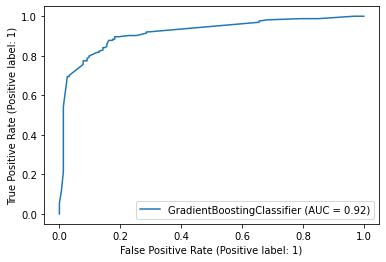

In [89]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gb,x_test,y_test)

In [90]:
import joblib
joblib.dump(gb,"Titanic.pkl")

['Titanic.pkl']